In [76]:
from pymatgen.io.vasp import Xdatcar
import matplotlib.pyplot as plt
import numpy as np
import yaml
from pymatgen.util.coord import pbc_shortest_vectors

import sys
sys.path.insert(0, "../../scripts/")
from utils import flatten_list, get_structures, indices_by_species

In [77]:
with open('../md_runs.yaml', 'r') as f:
    md_runs = yaml.load(f)
print(md_runs)

{'Li6PS5I': {'0p': [1, 2, 3, 4, 5], '50p': [1, 2, 3, 4, 5], '100p': [1, 2, 3, 4]}, 'Li6PS5Cl': {'0p': [1, 2, 3, 4], '50p': [1, 2, 3, 4], '100p': [1, 2, 3, 4]}}


In [78]:
system = 'Li6PS5Cl'
disorder = '50p'
data_dir = '../../data'
runs = md_runs[system][disorder]
xdatcar_filenames = [ f'{data_dir}/{system}/{disorder}/run{i}/inherent_XDATCAR.gz' for i in runs ]
xdatcars = ( Xdatcar( f ) for f in xdatcar_filenames )
structures = flatten_list( [ x.structures for x in xdatcars ] )
li_indices = indices_by_species( structures[0], 'Li' )
lattice = structures[0].lattice

In [138]:
t_start = 97
t_window = 50
t_end = t_start + t_window
selected_ions = [32, 90, 66, 138, 98, 184, 18, 42, 142, 115, 146, 162, 154]
struc_i = structures[t_start]
dr_ii = []
v_dr_ii = []
for struc_j in structures[t_start:t_end]:
    i_frac_coords = struc_i.frac_coords[li_indices]
    j_frac_coords = struc_j.frac_coords[li_indices]
    dr_ij = lattice.get_all_distances(i_frac_coords, j_frac_coords)
    dr_ii.append(np.diag(dr_ij))
    dr_ij = pbc_shortest_vectors(struc_i.lattice, i_frac_coords, j_frac_coords)
    v_dr_ii.append(np.einsum('iij->ij', dr_ij))
dr_ii = np.array(dr_ii).swapaxes(0,1)
v_dr_ii = np.array(v_dr_ii).swapaxes(0,1)
selected_ions.reverse()

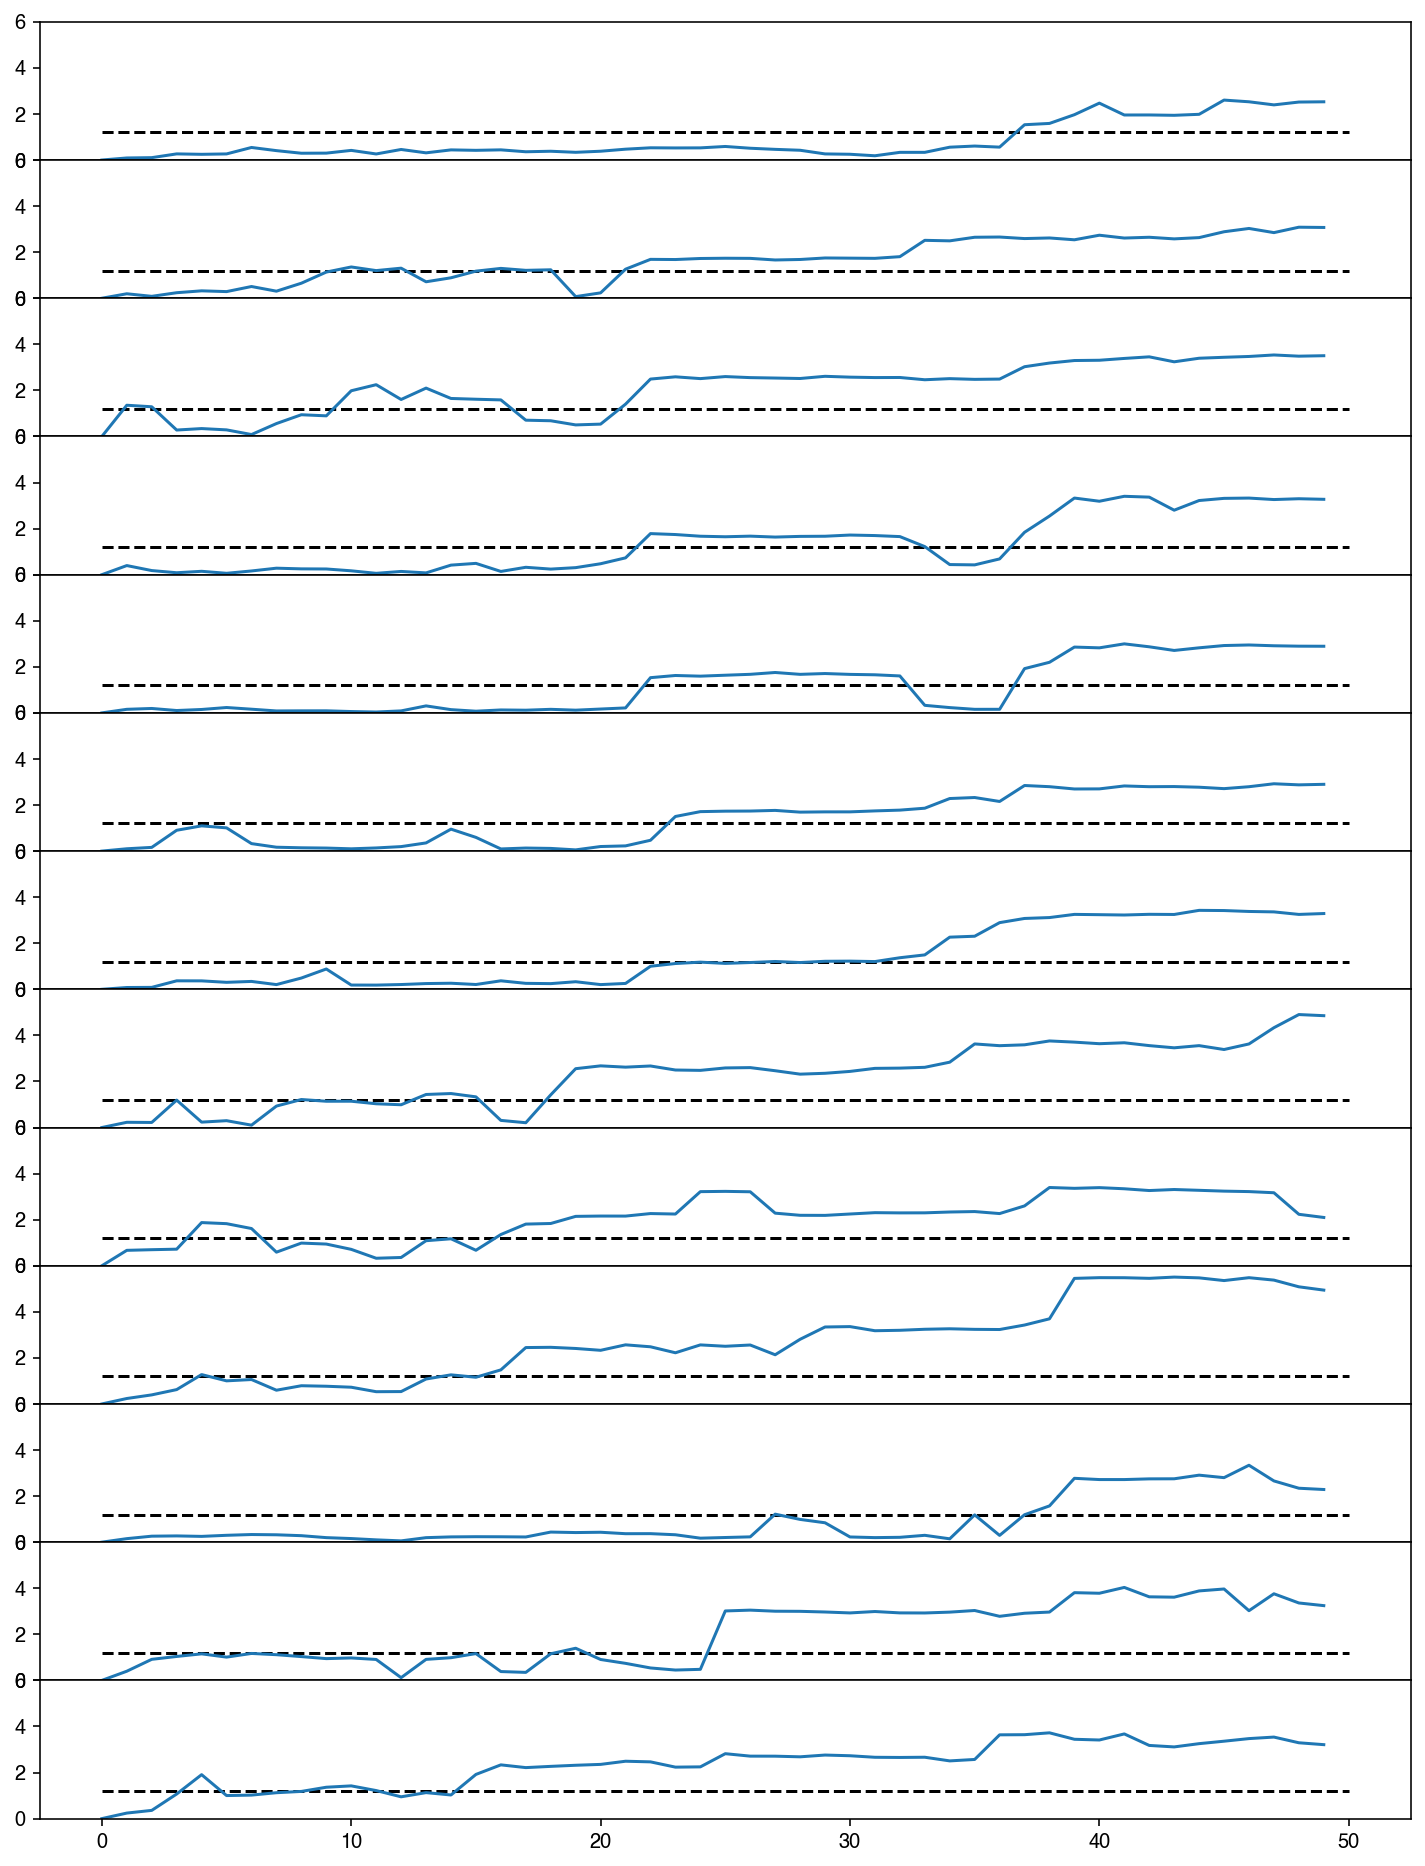

In [143]:
fig, axes = plt.subplots(len(selected_ions), figsize=(10,13), sharex=True)
for i, n in enumerate(selected_ions):
    axes[i].plot(dr_ii[n])
    axes[i].hlines(1.2, 0, len(dr_ii[n]), linestyle='--')
    axes[i].set_ylim([0,6.0])
fig.tight_layout()    
fig.subplots_adjust(hspace=0)
plt.show()

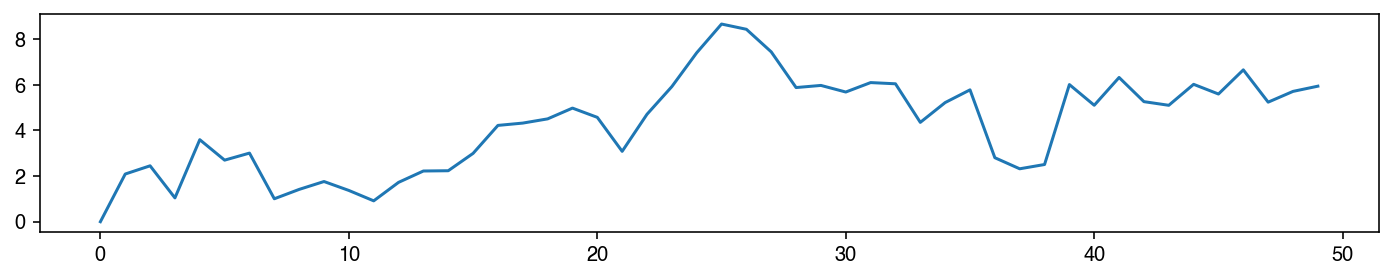

In [126]:
total_dr = np.linalg.norm(np.sum(v_dr_ii[selected_ions], axis=0), axis=1)
plt.figure(figsize=(12,2))
plt.plot(total_dr)
plt.show()

In [144]:
t_start = 370
t_window = 50
t_end = t_start + t_window
selected_ions = [164, 24, 2, 49, 34, 80, 141, 40, 57, 168, 117, 89, 19]
struc_i = structures[t_start]
dr_ii = []
v_dr_ii = []
for struc_j in structures[t_start:t_end]:
    i_frac_coords = struc_i.frac_coords[li_indices]
    j_frac_coords = struc_j.frac_coords[li_indices]
    dr_ij = lattice.get_all_distances(i_frac_coords, j_frac_coords)
    dr_ii.append(np.diag(dr_ij))
    dr_ij = pbc_shortest_vectors(struc_i.lattice, i_frac_coords, j_frac_coords)
    v_dr_ii.append(np.einsum('iij->ij', dr_ij))
dr_ii = np.array(dr_ii).swapaxes(0,1)
v_dr_ii = np.array(v_dr_ii).swapaxes(0,1)
selected_ions.reverse()

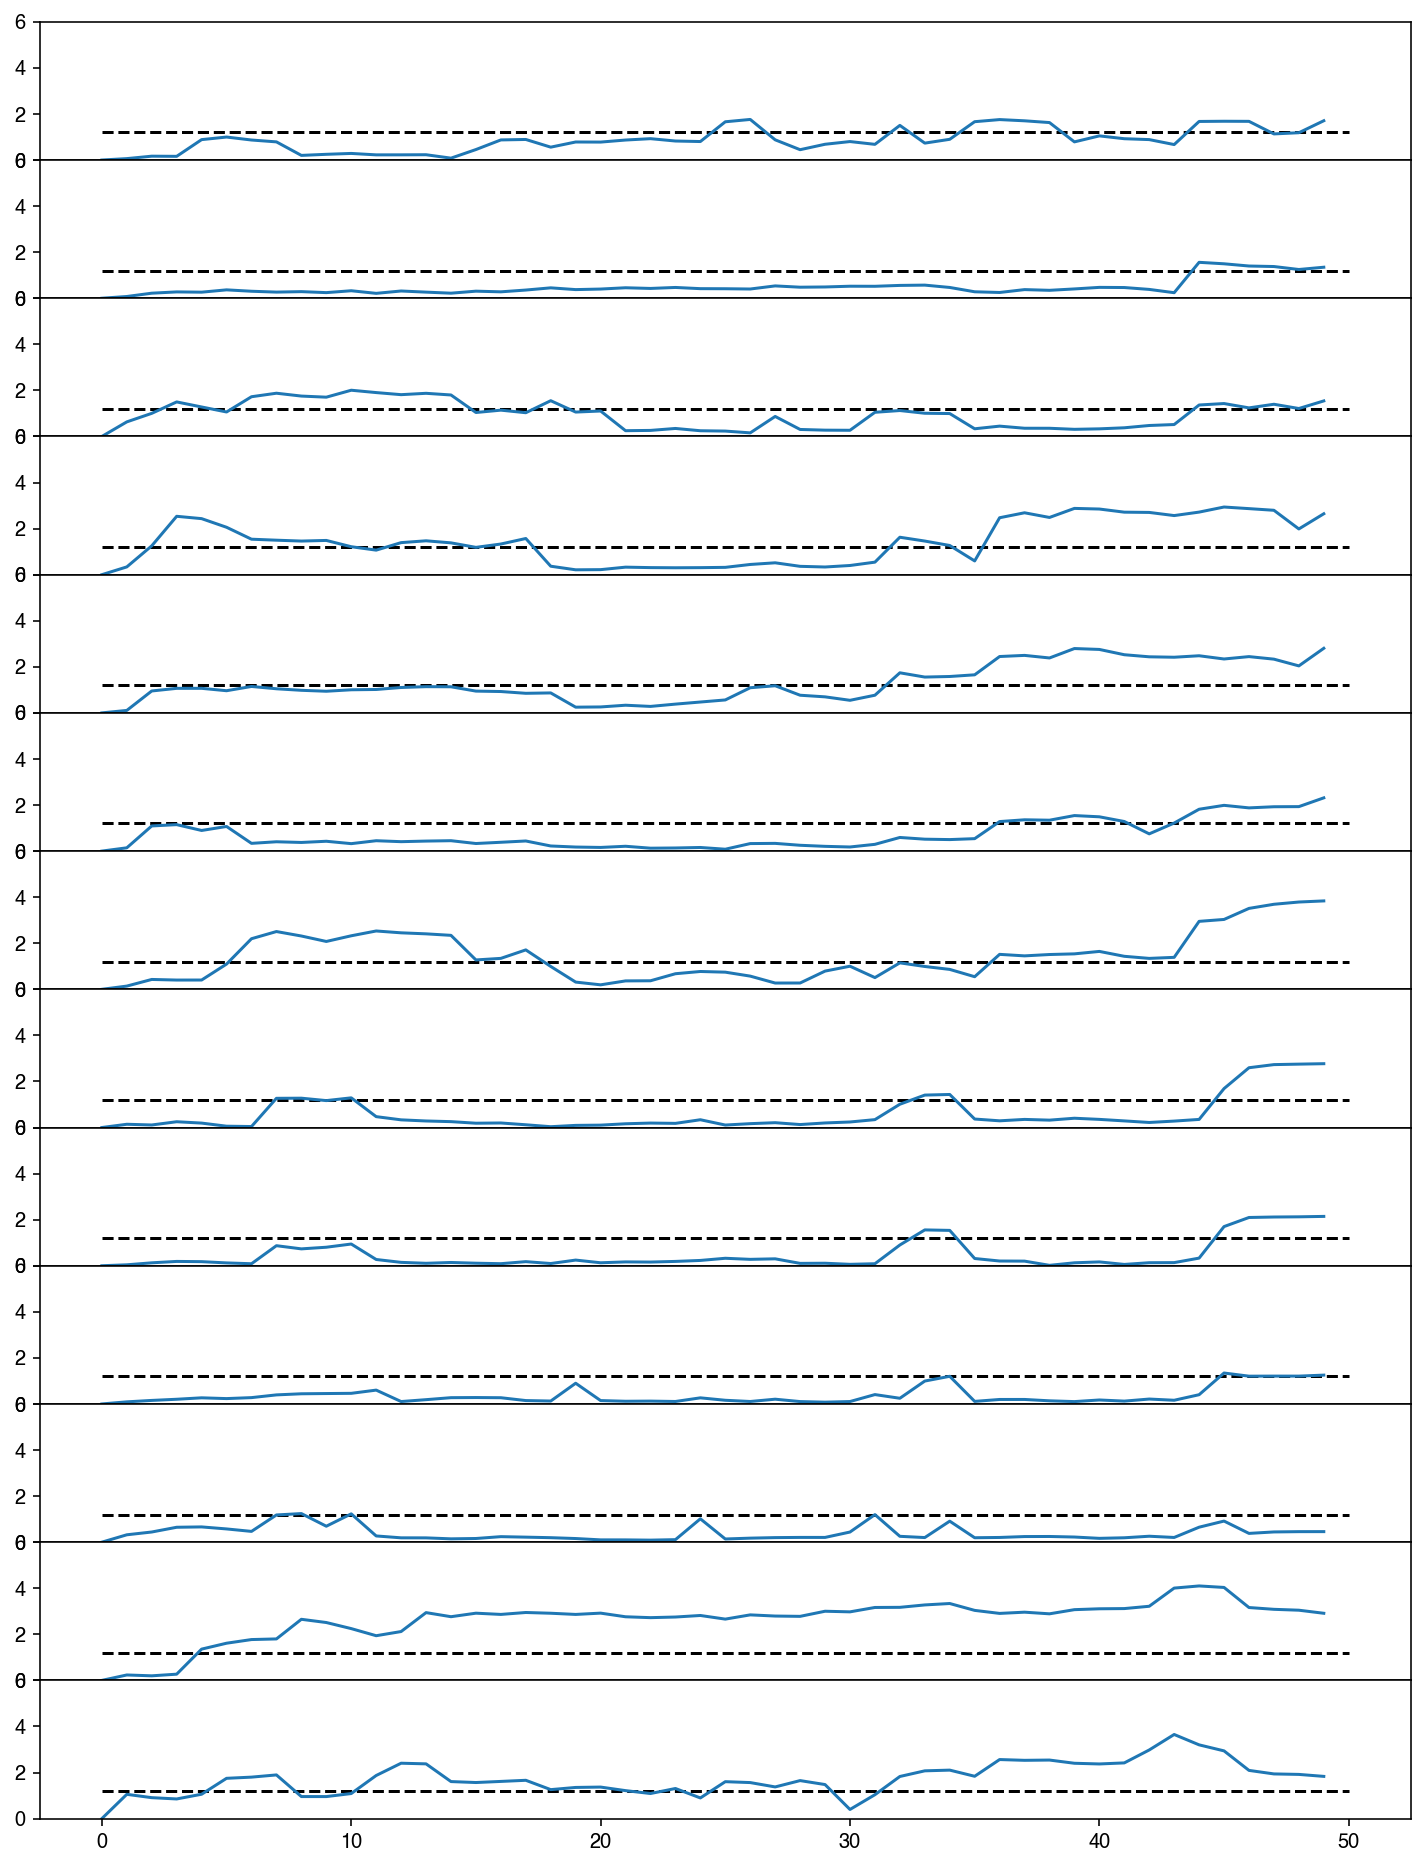

In [145]:
fig, axes = plt.subplots(len(selected_ions), figsize=(10,13), sharex=True)
for i, n in enumerate(selected_ions):
    axes[i].plot(dr_ii[n])
    axes[i].hlines(1.2, 0, len(dr_ii[n]), linestyle='--')
    axes[i].set_ylim([0,6.0])
fig.tight_layout()    
fig.subplots_adjust(hspace=0)
plt.show()